In [467]:
#MAP Project
# Our project seeks to explain the productivity of workers given explanatory variables regarding their personal qualities

In [614]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [616]:
data_1 = pd.read_csv("/Users/vancedimmick/Downloads/general_data.csv")
data_2 = pd.read_csv("/Users/vancedimmick/Downloads/hr_dashboard_data.csv")

In [618]:
#Data_1 which was the attrition in a company kaggle dataset had way more entries than
# data_2 had. Therefore, we reduced the number of observations in data_1 to 200 
# via random sample
Sample_data_1 = data_1.sample(n=200, replace=True, random_state=42)

In [620]:
Sample_data_1

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
860,861,26,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,Male,...,1.0,6,1,0,0,1.0,4.0,3.0,3,3
3772,3773,29,No,Travel_Rarely,Research & Development,1,3,Medical,1,Female,...,9.0,5,7,0,7,3.0,1.0,3.0,4,3
3092,3093,30,No,Travel_Rarely,Sales,25,3,Marketing,1,Male,...,11.0,5,5,0,2,3.0,4.0,3.0,3,4
466,467,24,No,Travel_Rarely,Sales,28,3,Life Sciences,1,Female,...,5.0,3,4,3,2,4.0,3.0,3.0,3,3
3444,3445,26,Yes,Travel_Frequently,Sales,2,3,Life Sciences,1,Male,...,6.0,2,3,1,2,1.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,3171,42,No,Travel_Rarely,Research & Development,28,4,Life Sciences,1,Female,...,10.0,5,10,2,2,3.0,4.0,3.0,3,3
1682,1683,24,No,Travel_Frequently,Sales,22,3,Life Sciences,1,Female,...,3.0,5,2,2,1,4.0,4.0,3.0,2,3
2255,2256,53,No,Travel_Rarely,Research & Development,2,4,Technical Degree,1,Male,...,35.0,2,9,8,8,4.0,2.0,2.0,3,4
1154,1155,30,No,Travel_Rarely,Human Resources,20,4,Life Sciences,1,Male,...,12.0,3,12,1,7,4.0,2.0,2.0,2,3


In [622]:
Sample_data_1 = Sample_data_1.drop("EmployeeID", axis=1)
Sample_data_1 = Sample_data_1.drop("PerformanceRating", axis=1)

In [624]:
Sample_data_1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
860,26,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,Male,1,...,0,1.0,6,1,0,0,1.0,4.0,3.0,3
3772,29,No,Travel_Rarely,Research & Development,1,3,Medical,1,Female,1,...,0,9.0,5,7,0,7,3.0,1.0,3.0,4
3092,30,No,Travel_Rarely,Sales,25,3,Marketing,1,Male,1,...,1,11.0,5,5,0,2,3.0,4.0,3.0,3
466,24,No,Travel_Rarely,Sales,28,3,Life Sciences,1,Female,1,...,1,5.0,3,4,3,2,4.0,3.0,3.0,3
3444,26,Yes,Travel_Frequently,Sales,2,3,Life Sciences,1,Male,2,...,2,6.0,2,3,1,2,1.0,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,42,No,Travel_Rarely,Research & Development,28,4,Life Sciences,1,Female,2,...,0,10.0,5,10,2,2,3.0,4.0,3.0,3
1682,24,No,Travel_Frequently,Sales,22,3,Life Sciences,1,Female,1,...,2,3.0,5,2,2,1,4.0,4.0,3.0,2
2255,53,No,Travel_Rarely,Research & Development,2,4,Technical Degree,1,Male,2,...,0,35.0,2,9,8,8,4.0,2.0,2.0,3
1154,30,No,Travel_Rarely,Human Resources,20,4,Life Sciences,1,Male,2,...,0,12.0,3,12,1,7,4.0,2.0,2.0,2


In [626]:
data_2

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,20-Jan,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,17-Jan,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,22-Jan,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,5-Jan,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,19-Jan,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,21-Jan,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,21-Jan,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,5-Jan,104216


In [628]:
data_2 = data_2.drop("Age", axis=1)

In [630]:
data_2 = data_2.drop("Name", axis=1)

In [632]:
data_2 = data_2.drop("Gender", axis=1)

In [634]:
data_2

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,11,57,25,4.7,Marketing,Analyst,20-Jan,63596
1,19,55,76,2.8,IT,Manager,Jan-99,112540
2,8,87,10,2.4,IT,Analyst,17-Jan,66292
3,1,53,4,1.4,Marketing,Intern,22-Jan,38303
4,14,3,9,4.5,IT,Team Lead,5-Jan,101133
...,...,...,...,...,...,...,...,...
195,9,32,87,3.5,HR,Junior Developer,19-Jan,50051
196,7,45,28,2.8,IT,Junior Developer,21-Jan,46612
197,3,36,77,1.6,Finance,Intern,21-Jan,32992
198,23,96,50,3.4,Marketing,Manager,5-Jan,104216


In [636]:
# Create a common 'ID' column in both DataFrames in order to merge them

In [638]:
data_2["ID"]= range(1, len(data_2)+1)
Sample_data_1["ID"]= range(1, len(Sample_data_1)+1)


In [640]:
data_2

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,ID
0,11,57,25,4.7,Marketing,Analyst,20-Jan,63596,1
1,19,55,76,2.8,IT,Manager,Jan-99,112540,2
2,8,87,10,2.4,IT,Analyst,17-Jan,66292,3
3,1,53,4,1.4,Marketing,Intern,22-Jan,38303,4
4,14,3,9,4.5,IT,Team Lead,5-Jan,101133,5
...,...,...,...,...,...,...,...,...,...
195,9,32,87,3.5,HR,Junior Developer,19-Jan,50051,196
196,7,45,28,2.8,IT,Junior Developer,21-Jan,46612,197
197,3,36,77,1.6,Finance,Intern,21-Jan,32992,198
198,23,96,50,3.4,Marketing,Manager,5-Jan,104216,199


In [642]:
merged_data = pd.merge(data_2, Sample_data_1, on='ID'); merged_data

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department_x,Position,Joining Date,Salary,ID,Age,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,11,57,25,4.7,Marketing,Analyst,20-Jan,63596,1,26,...,0,1.0,6,1,0,0,1.0,4.0,3.0,3
1,19,55,76,2.8,IT,Manager,Jan-99,112540,2,29,...,0,9.0,5,7,0,7,3.0,1.0,3.0,4
2,8,87,10,2.4,IT,Analyst,17-Jan,66292,3,30,...,1,11.0,5,5,0,2,3.0,4.0,3.0,3
3,1,53,4,1.4,Marketing,Intern,22-Jan,38303,4,24,...,1,5.0,3,4,3,2,4.0,3.0,3.0,3
4,14,3,9,4.5,IT,Team Lead,5-Jan,101133,5,26,...,2,6.0,2,3,1,2,1.0,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,32,87,3.5,HR,Junior Developer,19-Jan,50051,196,42,...,0,10.0,5,10,2,2,3.0,4.0,3.0,3
196,7,45,28,2.8,IT,Junior Developer,21-Jan,46612,197,24,...,2,3.0,5,2,2,1,4.0,4.0,3.0,2
197,3,36,77,1.6,Finance,Intern,21-Jan,32992,198,53,...,0,35.0,2,9,8,8,4.0,2.0,2.0,3
198,23,96,50,3.4,Marketing,Manager,5-Jan,104216,199,30,...,0,12.0,3,12,1,7,4.0,2.0,2.0,2


In [686]:
merged_data = merged_data.drop("Age", axis=1)

In [688]:
##List of the variables (columns) left in the merged file after cleaning duplicate variables and identifier information
## Any of these can be used as either independent or dependent variables in the models
merged_data.columns

Index(['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)',
       'Feedback Score', 'Department_x', 'Position', 'Joining Date', 'Salary',
       'ID', 'Attrition', 'BusinessTravel', 'Department_y', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'Output'],
      dtype='object')

In [690]:
##data types
data_types = merged_data.dtypes; merged_data.columns

Index(['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)',
       'Feedback Score', 'Department_x', 'Position', 'Joining Date', 'Salary',
       'ID', 'Attrition', 'BusinessTravel', 'Department_y', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'Output'],
      dtype='object')

In [692]:
print(merged_data["Projects Completed"].quantile(.75))

17.0


In [694]:
merged_data["Output"] = 0

# Loop through each row and set the "Output" value
for index, row in merged_data.iterrows():
    if row["Projects Completed"] > 17:
        merged_data.at[index, "Output"] = 1
merged_data["Output"]

0      0
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: Output, Length: 200, dtype: int64

In [696]:
#End of data cleaning ^^

In [698]:
## Prepping data to be used in decision tree
## Label Encoder assigns numerical label to categorical columns so the tree can process
## categories to make decisions

label_encoder = LabelEncoder()
for column in merged_data.columns:
    if merged_data[column].dtypes == "object":
        merged_data[column] = label_encoder.fit_transform(merged_data[column])

In [700]:
#Create training and testing set for models

In [702]:
train_set, test_set = train_test_split(merged_data, test_size=0.1, random_state=17)

In [704]:
ProductivityOver75_train_x = train_set.drop(["Output", "Projects Completed", "ID", "Joining Date", "StockOptionLevel", "TrainingTimesLastYear", "Feedback Score", "EmployeeCount", "MonthlyIncome", "Over18", "YearsWithCurrManager" ], axis=1)
ProductivityOver75_train_y = train_set["Output"].copy()

In [706]:
ProductivityOver75_test_x = test_set.drop(["Output","Projects Completed", "ID", "Joining Date", "StockOptionLevel", "TrainingTimesLastYear", "Feedback Score", "EmployeeCount", "MonthlyIncome", "Over18", "YearsWithCurrManager" ], axis=1)
ProductivityOver75_test_y = test_set["Output"].copy()

In [708]:
##Decision Tree

In [711]:
tree_reg = DecisionTreeRegressor(random_state=42)  

In [713]:
tree_reg.fit(ProductivityOver75_train_x, ProductivityOver75_train_y)

DecisionTreeRegressor(random_state=42)

In [716]:
##In sample evaluation – Tree model 

ProductivityOver75_predictions_train_tree = tree_reg.predict(ProductivityOver75_train_x) 
tree_mse = mean_squared_error(ProductivityOver75_train_y, ProductivityOver75_predictions_train_tree) 
tree_rmse = np.sqrt(tree_mse) 
tree_rmse

0.0

In [718]:
ProductivityOver75_predictions_test_tree = tree_reg.predict(ProductivityOver75_test_x) 
tree_mse = mean_squared_error(ProductivityOver75_test_y, ProductivityOver75_predictions_test_tree) 
tree_rmse = np.sqrt(tree_mse) 
tree_rmse

0.4472135954999579

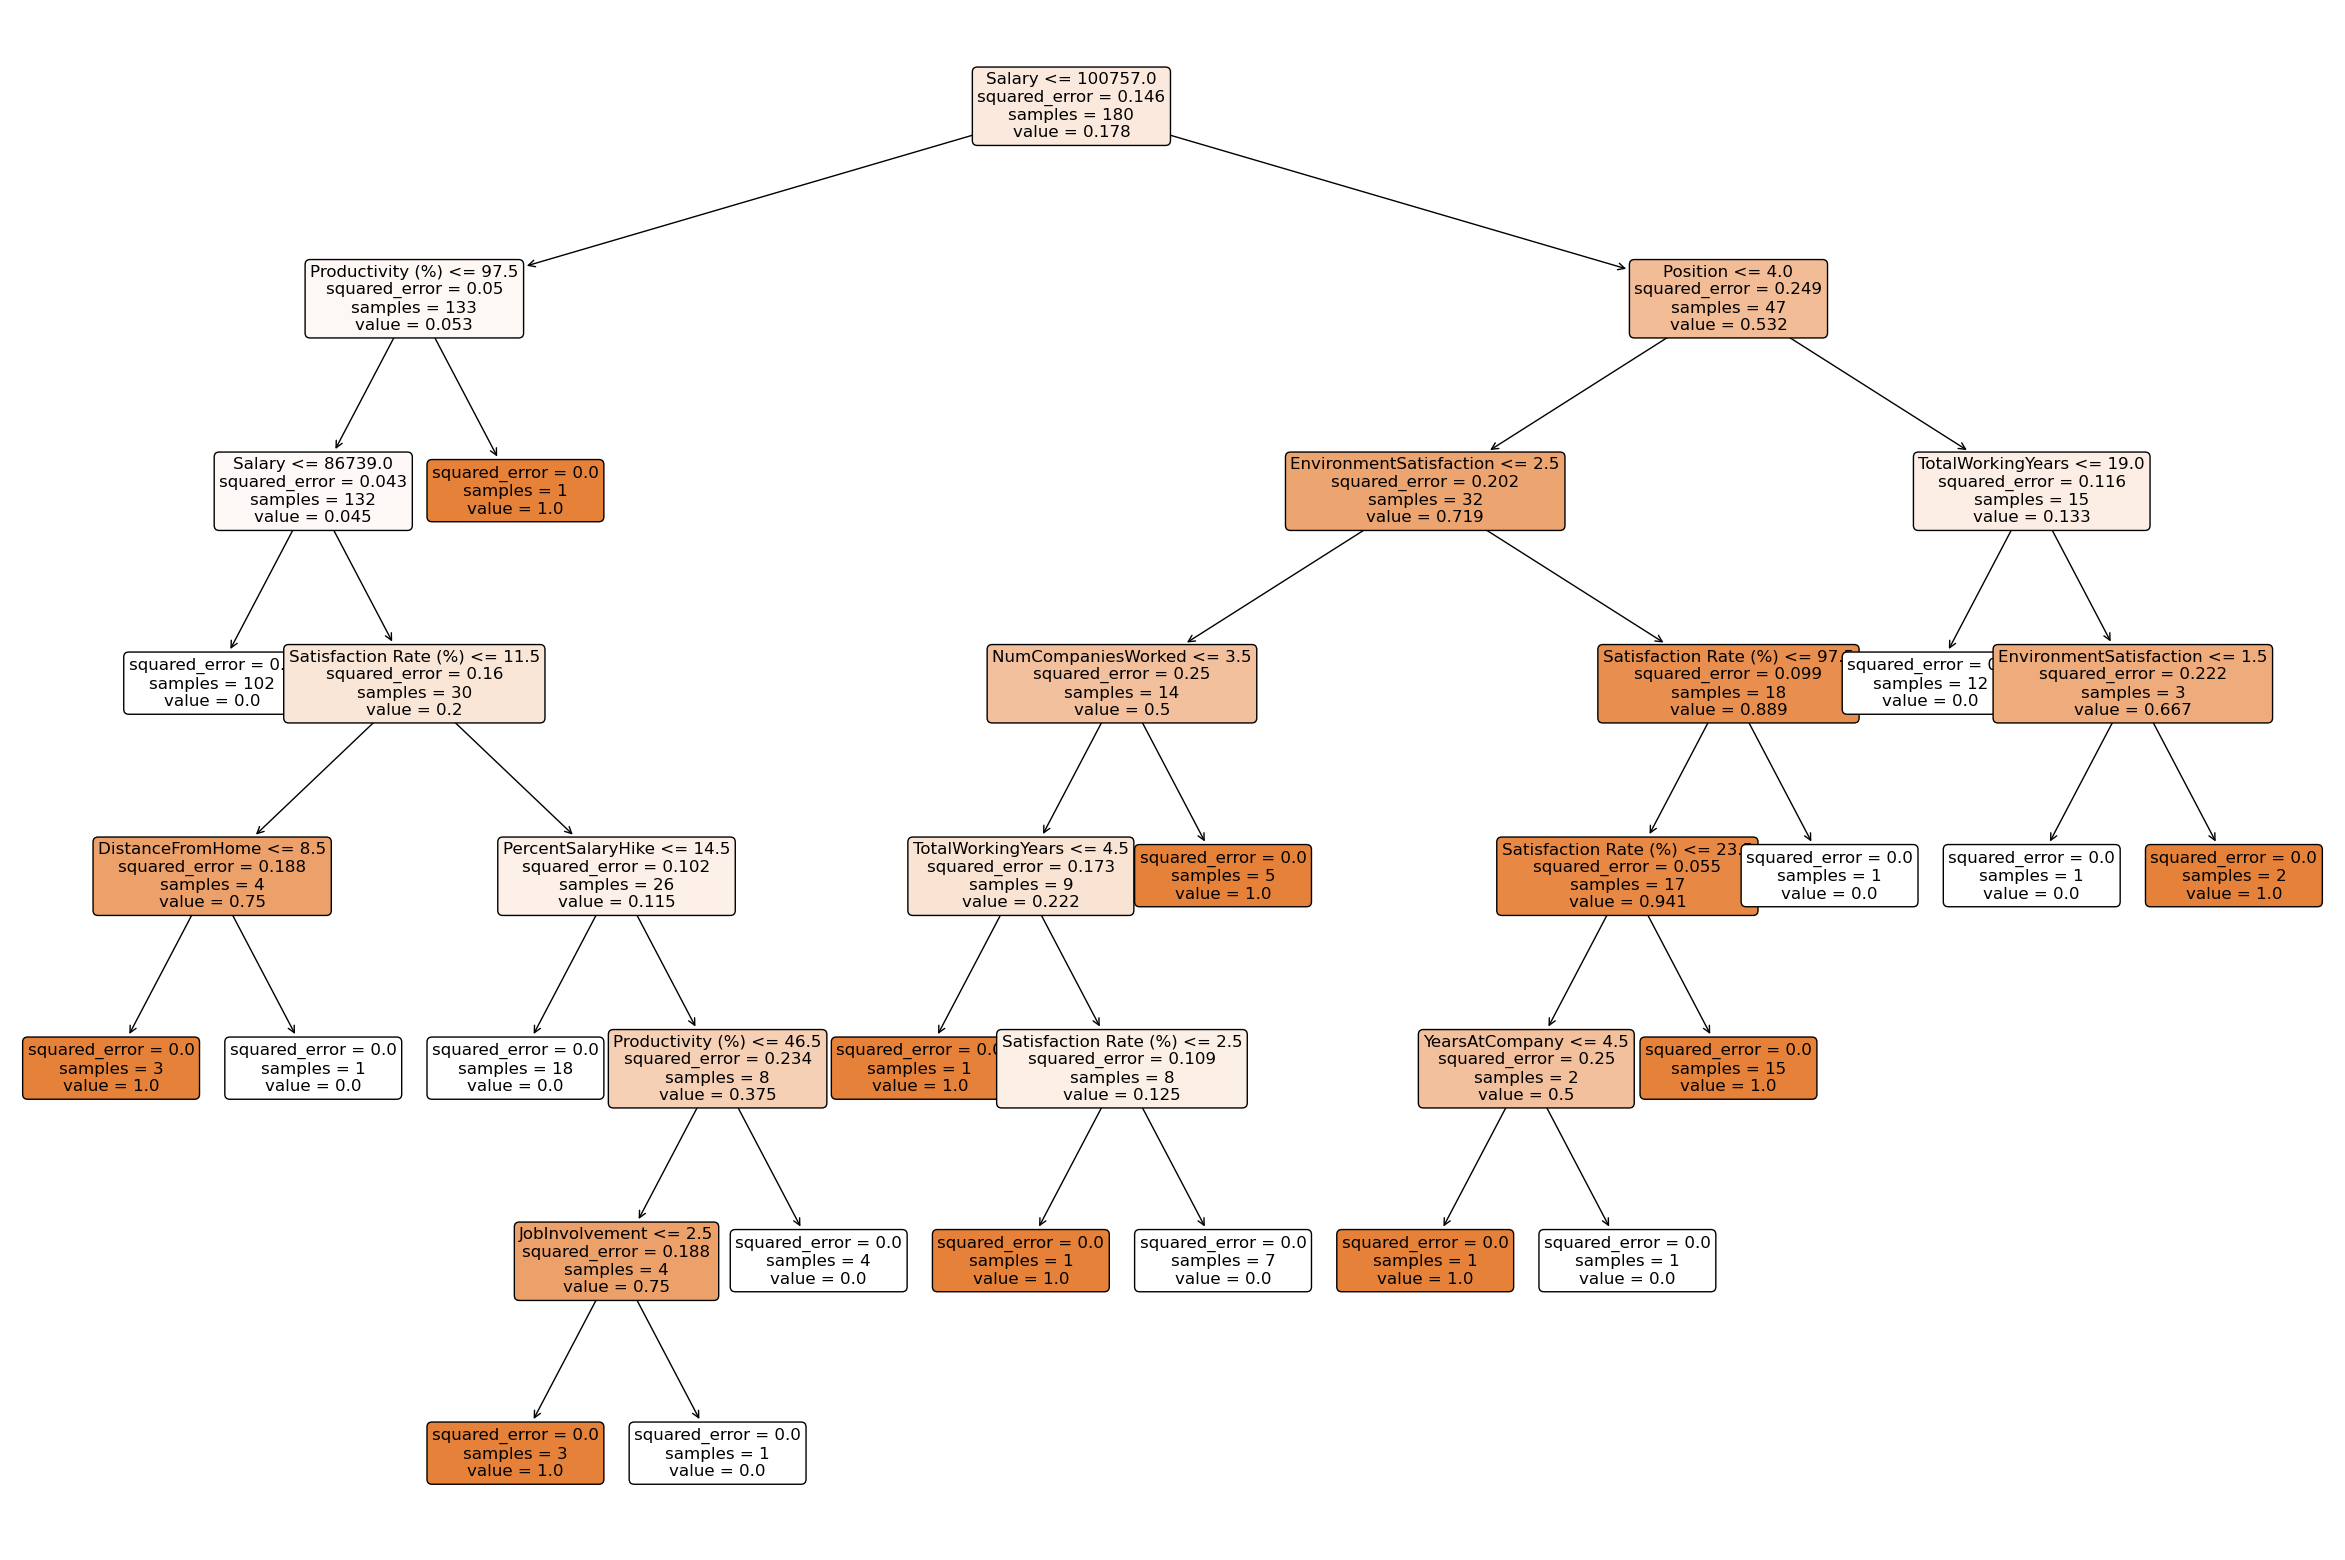

In [720]:
##chat gpt code for plotting the decision tree
plt.figure(figsize=(30, 20))
plot_tree(tree_reg, filled=True, feature_names=ProductivityOver75_train_x.columns, rounded=True, fontsize=12)
plt.show()

In [721]:
# Create a DataFrame with actual vs predicted values for the test set
predictions_df = pd.DataFrame({
    'Actual Values': ProductivityOver75_test_y,
    'Predicted Values': ProductivityOver75_predictions_test_tree
})

# Optionally, if you want to see all predictions:
print(predictions_df)  # Uncomment this if you want to see all the predictions

     Actual Values  Predicted Values
0                0               0.0
146              0               0.0
158              1               1.0
176              0               0.0
197              0               0.0
82               0               0.0
75               1               0.0
85               1               0.0
80               1               0.0
157              0               0.0
71               0               0.0
95               0               0.0
138              1               1.0
109              0               0.0
147              0               0.0
192              0               0.0
126              0               0.0
16               0               0.0
87               0               1.0
103              1               1.0


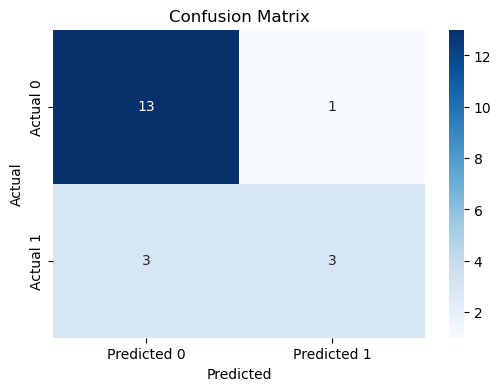

In [722]:
# Assuming ProductivityOver75_test_y and ProductivityOver75_predictions_test_tree are defined
cm = confusion_matrix(ProductivityOver75_test_y, ProductivityOver75_predictions_test_tree)

# Plot the confusion matrix with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [723]:

TP = cm[1, 1]  # True Positive
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative
TN = cm[0, 0]  # True Negative

# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Accuracy: 0.8
Precision: 0.75
Recall: 0.5
F1 Score: 0.6
